# Diagnóstico Inicial da Evasão - CETEC

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

def plot_percentage(df, x, y, xlabel):   
    counts = df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    print(counts)
    g = sns.catplot(x=x, y='percent', hue=y, data=counts, kind='bar')
    
    g.set(xlabel = xlabel)
    
    new_title = 'Evasão'
    g._legend.set_title(new_title)
    # replace labels
    new_labels = ['Não', 'Sim']
    for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
    plt.show()

df = pd.read_csv('/home/ramon/extrator/survival/ze_final.csv')

In [2]:
df = df[df['centro'] == 'CETEC']

In [3]:
def permutation_test(events, obs_diff, n1):
    n = len(events)
    n2 = n-n1
    idxs = np.arange(0, n)



    values = []
    for i in range(10000):
        foo = np.full(n, False)
        idx_a = np.random.choice(idxs, n1, replace=False)
        foo[idx_a] = True

        diff = np.abs(events[foo].mean() - events[~foo].mean())
        values.append(diff)

    return (np.mean(np.array(values) > obs_diff))

def proportion_test(df, col_name):
    idx = df['time'] == df.groupby('matricula')['time'].transform('max')
    counts = df[idx].groupby(col_name)['event'].mean().values
    obs_diff = np.abs(counts[0] - counts[1])
    n1 = df[idx][col_name].value_counts().values[0]
    events = df.loc[idx, 'event'].values
    
    return (permutation_test(events, obs_diff, n1))

from statsmodels.stats.proportion import proportions_ztest

def proportion_test2(df, col_name): 
    count = df[idx].groupby(col_name)['event'].sum().values
    nobs = df[idx].groupby(col_name)['event'].count().values

    stat, pval = proportions_ztest(count, nobs)
    return pval

# Perfil dos Estudantes na Amostra

- 64% evadiram
- 86% possuem cidade de origem diferente da cidade do campus
- 35% são do sexo feminino
- Idade média dos estudantes é 21
- 3461 estudantes na amostra

In [4]:
idx = (df['time'] == df.groupby('matricula')['time'].transform('max'))

print(df[idx]['event'].value_counts(normalize=True))

print(df[idx]['is_outra_cidade'].value_counts(normalize=True))

print(df[idx]['sexo'].value_counts(normalize=True))

print(df[idx]['idade'].mean())

print(df['matricula'].nunique())

1    0.646923
0    0.353077
Name: event, dtype: float64
1    0.869402
0    0.130598
Name: is_outra_cidade, dtype: float64
1    0.648945
0    0.351055
Name: sexo, dtype: float64
21.039295001444668
3461


# Q.1 Taxa de evasão é maior para estudantes cuja cidade de origem difere da cidade do campus?


- Sim. Taxa de evasão é maior para estudantes cuja cidade de origem é igual àquela do campus (67% vs 64%)
- A diferença não é estatisticamente significativa

   is_outra_cidade  event    percent
0                0      1  67.477876
1                0      0  32.522124
2                1      1  64.309429
3                1      0  35.690571


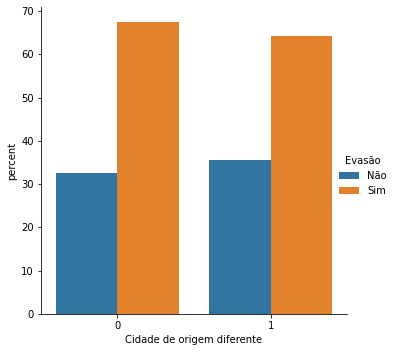

In [5]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

#print(df[idx]['is_outra_cidade'].value_counts(normalize=True))

plot_percentage(df[idx], 'is_outra_cidade', 'event', 'Cidade de origem diferente')

In [31]:
print('%.3f'%(proportion_test(df, 'is_outra_cidade')))
print(proportion_test2(df, 'is_outra_cidade'))

0.190
0.1886595606337459


# Q.2 Taxa de evasão é maior para ingressantes no 1o semestre ou 2o semestre letivo? (Ex: taxa de evasão é maior para ingressantes em 2019.1 ou 2019.2?)

- Taxa de Evasão é maior entre ingressantes no 2o semestre (70% vs 59%)
- A diferença é estatisticamente significativa

1    0.514145
2    0.485855
Name: semestreIngresso, dtype: float64
   semestreIngresso  event    percent
0                 1      1  59.517125
1                 1      0  40.482875
2                 2      1  70.231729
3                 2      0  29.768271


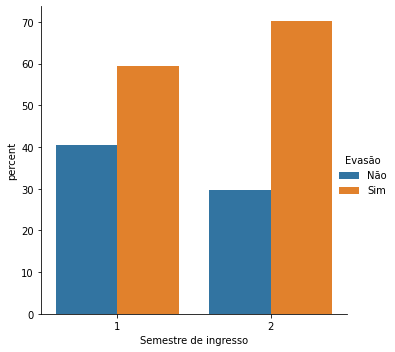

In [7]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['semestreIngresso'].value_counts(normalize=True))

plot_percentage(df[idx], 'semestreIngresso', 'event', 'Semestre de ingresso')

In [33]:
print('%.3f'%(proportion_test(df, 'semestreIngresso')))
print(proportion_test2(df, 'semestreIngresso'))

0.000
4.22181712750041e-11


# Q.3 Em termos gerais, a taxa de evasão é maior no 1o semestre ou 2o semestre do ano letivo? Independentemente do semestre de ingresso do estudante


- Taxa de Evasão é maior no 2o semestre letivo (70% vs 58%). Por quê? O SISU pode ser uma linha de investigação.
- A diferença é estatiscamente significativa

2    0.526848
1    0.473152
Name: semestreLetivo, dtype: float64
   semestreLetivo  event    percent
0               1      1  58.694326
1               1      0  41.305674
2               2      1  70.136986
3               2      0  29.863014


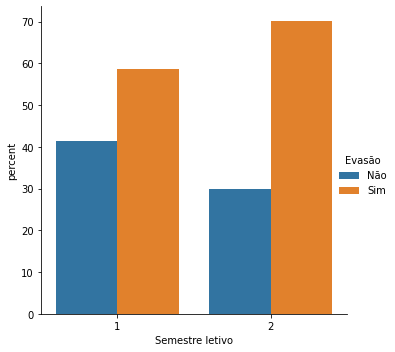

In [12]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['semestreLetivo'].value_counts(normalize=True))

plot_percentage(df[idx], 'semestreLetivo', 'event', 'Semestre letivo')

In [34]:
print('%.3f'%(proportion_test(df, 'semestreLetivo')))
print(proportion_test2(df, 'semestreLetivo'))

0.000
1.965163231305376e-12


In [4]:
idx = (df['time'] == df.groupby('matricula')['time'].transform('max')) & (df['event'] == 1)
df[idx].groupby('semestreLetivo')['semestreIngresso'].value_counts(normalize=True)

semestreLetivo  semestreIngresso
1               1                   0.631250
                2                   0.368750
2               2                   0.645817
                1                   0.354183
Name: semestreIngresso, dtype: float64

# Q.4 Taxa taxa de evasão é maior para homens ou mulheres?

- A taxa de evasão é maior para homens (65% vs 63%).
- A diferença não é estatisticamente significativa.

1    0.648672
0    0.351328
Name: sexo, dtype: float64
   sexo  event    percent
0     0      1  63.270337
1     0      0  36.729663
2     1      1  65.509568
3     1      0  34.490432


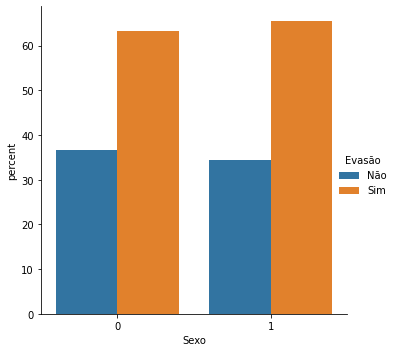

In [27]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['sexo'].value_counts(normalize=True))

plot_percentage(df[idx], 'sexo', 'event', 'Sexo')

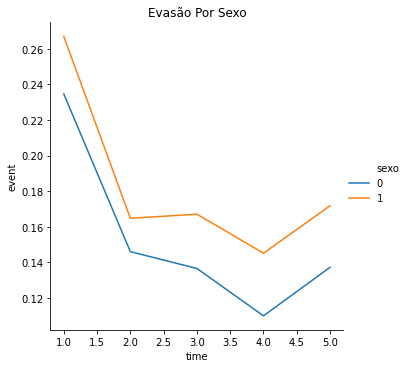

In [93]:
data = df.groupby(['time','sexo']).agg({'event':'mean'}).reset_index()
ax = sns.relplot(x='time', y='event', data=data, hue='sexo',  kind="line")    
ax.set(title='Evasão Por Sexo')    

In [35]:
print('%.3f'%(proportion_test(df, 'sexo')))
print(proportion_test2(df, 'sexo'))

0.181
0.18794479165109945


# Q.5 Taxa de evasão decresce com o tempo?

- A taxa de evasão tende a decrescer até o 2o semestre, porém há uma tendência de alta a partir do 3o semestre

[Text(0.5, 1.0, 'Evasão Geral')]

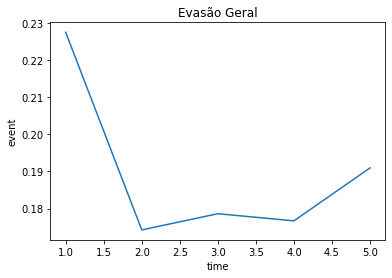

In [28]:
data = df.groupby('time').agg({'event':'mean'}).reset_index()

ax = sns.lineplot(x='time', y='event', data=data)    
ax.set(title='Evasão Geral')

# Q.6 Taxa de evasão difere entre ingressantes por cota e ampla concorrência?

- Taxa de evasão é maior entre cotistas (67% vs 62%)
- A diferença é estatisticamente significativa.
- A taxa de evasão de cotistas tende a crescer a partir do 3o semestre

0    0.548788
1    0.451212
Name: is_cotista, dtype: float64
   is_cotista  event    percent
0           0      1  62.230405
1           0      0  37.769595
2           1      1  67.754319
3           1      0  32.245681


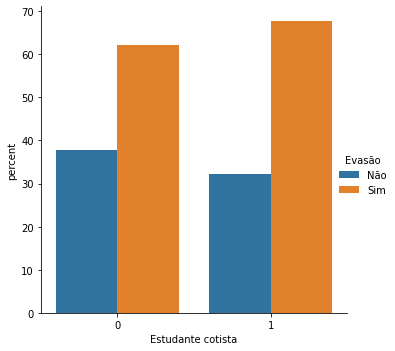

In [29]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['is_cotista'].value_counts(normalize=True))

plot_percentage(df[idx], 'is_cotista', 'event', 'Estudante cotista')

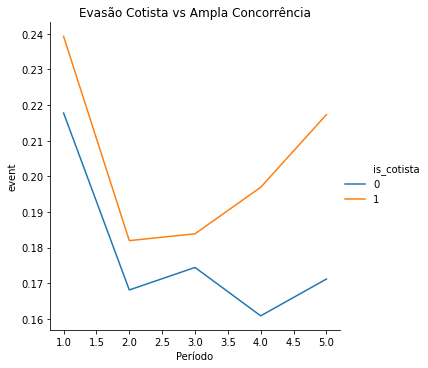

In [37]:
data = df.groupby(['time','is_cotista']).agg({'event':'mean'}).reset_index()
ax = sns.relplot(x='time', y='event', data=data, hue='is_cotista',  kind="line")    
ax.set(title='Evasão Cotista vs Ampla Concorrência', xlabel='Período')    

In [36]:
print('%.3f'%(proportion_test(df, 'is_cotista')))
print(proportion_test2(df, 'is_cotista'))

0.001
0.0007098791203163235


# Q.7 A idade de ingresso afeta a taxa de evasão?

- Evasão tende tende a ser maior com a idade de ingreso. Por quê? Necessidade de trabalhar? Questões ligadas à natureza dos cursos?

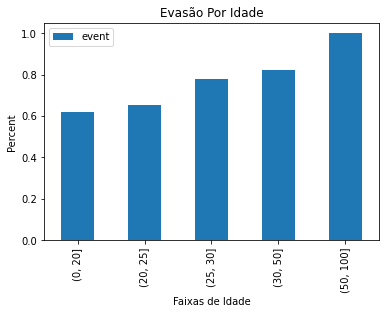

In [34]:
col = 'idade_cat'
df[col] = pd.cut(df.idade, bins=[0,20,25,30,50,100])

idx = df['time'] == df.groupby('matricula')['time'].transform('max')


ax = df[idx].groupby(col).agg({'event':'mean'}).plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão Por Idade', xlabel='Faixas de Idade')
plt.show()

# Q.8 Interstício entre o término do ensino médio e o ingresso no curso afeta a evasão?

- Taxa de evasão tende a crescer com o aumento do interstício.

(0.0, 1.0]      0.446353
(1.0, 2.0]      0.200723
(2.0, 3.0]      0.085292
(10.0, 41.0]    0.058168
(3.0, 4.0]      0.055756
(4.0, 5.0]      0.049427
(5.0, 6.0]      0.033454
(6.0, 7.0]      0.022604
(7.0, 8.0]      0.018686
(8.0, 9.0]      0.017782
(9.0, 10.0]     0.011754
Name: gap_cat, dtype: float64


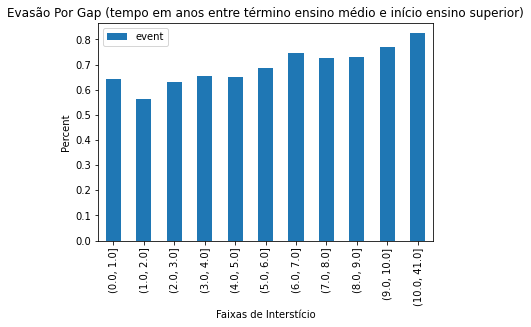

In [33]:
col = 'gap_cat'
df[col] = pd.cut(df.gap, bins=[0,1,2,3,4,5,6,7,8,9,10, df.gap.max()])

idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx][col].value_counts(normalize=True))

ax = df[idx].groupby(col).agg({'event':'mean'}).plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão Por Gap (tempo em anos entre término ensino médio e início ensino superior)', xlabel='Faixas de Interstício')
plt.show()